In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Applications/Work Space/Python Work Space/python_forcesting/airline_passengers.csv", index_col="Month", parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.isna().sum()

Passengers    0
dtype: int64

<Axes: xlabel='Month'>

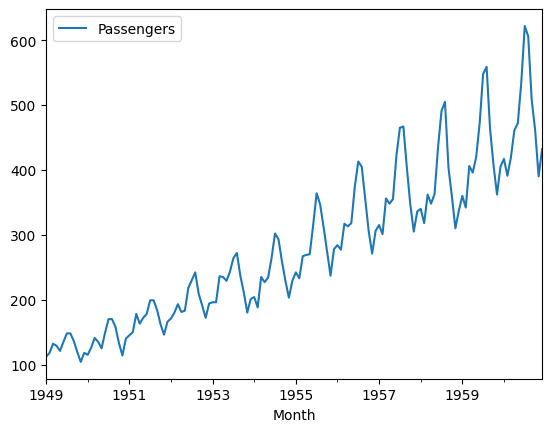

In [6]:
df.plot()

### EWMA (Exponential Weighted Moving Average)

In [20]:
alpha = 0.4

<class 'pandas.core.window.ewm.ExponentialMovingWindow'>


<Axes: xlabel='Month'>

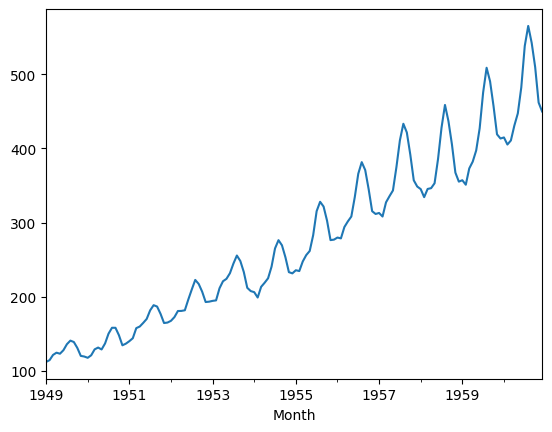

In [21]:
df["EWMA"] = df["Passengers"].ewm(alpha=alpha, adjust=False).mean()
print(type(df["Passengers"].ewm(alpha=alpha, adjust=False)))
df["EWMA"].plot()

<Axes: xlabel='Month'>

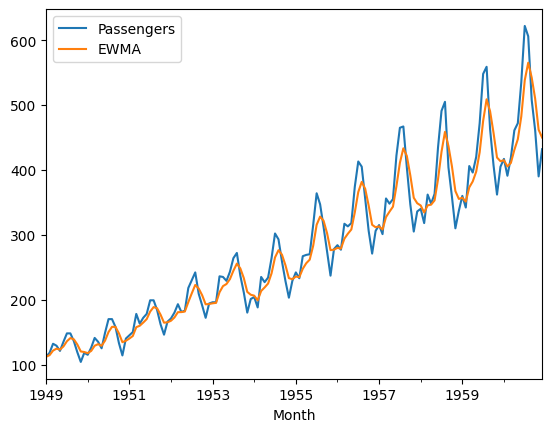

In [22]:
df.plot()

### Manual EWMA (Exponential Weighted Moving Average)

In [24]:
manuel_ewma = []
for x in df["Passengers"]:
    
    if len(manuel_ewma) > 0:
        xhat = alpha * x + (1 - alpha) * manuel_ewma[-1]
    else:
        xhat = x
    
    manuel_ewma.append(xhat)

df["manual_EWMA"] = manuel_ewma


<Axes: xlabel='Month'>

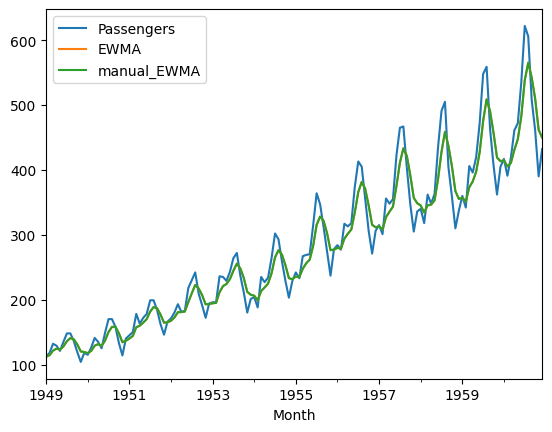

In [26]:
df.plot()

In [27]:
df.drop("manual_EWMA", axis=1, inplace=True)

In [28]:
df

,Passengers,EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,114.400000
1949-03-01,132,121.440000
1949-04-01,129,124.464000
1949-05-01,121,123.078400
...,...,...
1960-08-01,606,565.342258
1960-09-01,508,542.405355
1960-10-01,461,509.843213
